# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [2]:
# Carregando a base features.txt em uma Series
# Eliminando a primeira linha e concatenando as duas primeiras colunas

features = pd.read_csv('features.txt',sep=" ", header=None)
features['Colunas'] = features[0].astype(str) + ' ' + features[1]
features = features.iloc[:,2:]
features = features.squeeze()
features.head()

0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
Name: Colunas, dtype: object

In [3]:
# Carregando a base subject_train.txt em uma Series

subject_train = pd.read_csv('subject_train.txt', sep =" ", header=None)
subject_train = subject_train.squeeze()
subject_train.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [4]:
# Carregando a base X_train.txt
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)

# Fazendo com que as colunas deste dataframe tenham os nomes indicados em features.txt
X_train.rename(columns=features, inplace=True)

# Sem alterar a ordem dos dataframes, colocando o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe**
X_train['Subject'] = subject_train

# Faça com que este dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
X_train.set_index('Subject',drop= True, append = True, inplace = True)


X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
subject_test = pd.read_csv('subject_test.txt', delimiter=' ', header=None)
subject_test = subject_test.squeeze()

X_test = (pd.read_csv('X_test.txt', header=None, names=features, delim_whitespace=True).assign(subject_test=subject_test))
X_test.set_index(keys='subject_test', drop=True, append=True, inplace=True)

X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [6]:
y_train = (pd.read_csv('y_train.txt', header=None).squeeze('columns'))
y_test = (pd.read_csv('y_test.txt', header=None).squeeze('columns'))


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X=X_train, y=y_train)

three_best_vars = (pd.DataFrame(data={'var': X_train.columns, 'feature_importances_': clf.feature_importances_})
                     .sort_values(by='feature_importances_', ascending=False))
print(three_best_vars)

                                     var  feature_importances_
52                53 tGravityAcc-min()-X              0.285303
389  390 fBodyAccJerk-bandsEnergy()-1,16              0.254091
41               42 tGravityAcc-mean()-Y              0.164608
214             215 tGravityAccMag-std()              0.140142
69          70 tGravityAcc-arCoeff()-Y,1              0.122278
..                                   ...                   ...
184        185 tBodyGyroJerk-entropy()-Z              0.000000
183        184 tBodyGyroJerk-entropy()-Y              0.000000
182        183 tBodyGyroJerk-entropy()-X              0.000000
181            182 tBodyGyroJerk-iqr()-Z              0.000000
560             561 angle(Z,gravityMean)              0.000000

[561 rows x 2 columns]


In [14]:
best_vars = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False, inplace=True)


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

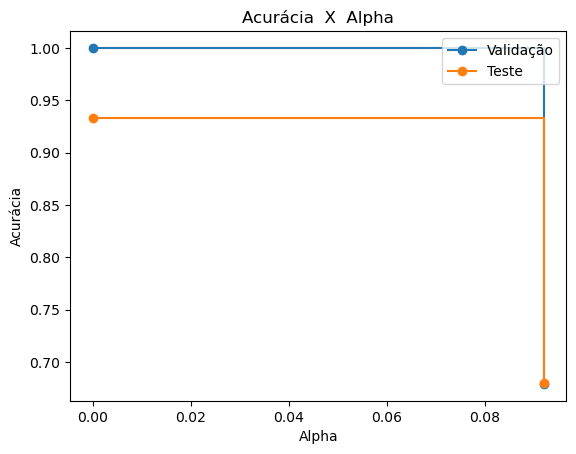

CPU times: total: 2.48 s
Wall time: 7.82 s


In [10]:
%%time

path = clf.cost_complexity_pruning_path(X=X_train , y=y_train)
ccp_alphas, impurities = path.ccp_alphas[::5], path.impurities[::5]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X=X_train, y=y_train)
    clfs.append(clf)

train_scores = [clf.score(X=X_train, y=y_train) for clf in clfs]
valid_scores = [clf.score(X=X_valid, y=y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  X  Alpha')
ax.plot(ccp_alphas, train_scores, marker='o', label='Validação',drawstyle='steps-post')
ax.plot(ccp_alphas, valid_scores, marker='o', label='Teste', drawstyle='steps-post')
ax.legend()
plt.show()

In [11]:
ind_best_tree= len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[ind_best_tree]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_best_tree]*100:.2f}')

best_tree

Acurácia da melhor árvore na base de validação: 93.31


DecisionTreeClassifier(random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 83.71


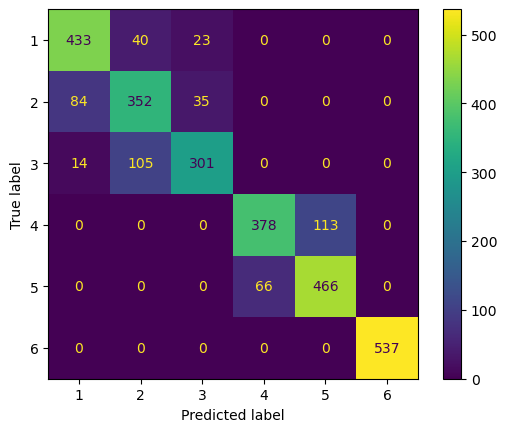

In [12]:
accuracy_test = best_tree.score(X=X_test, y=y_test)

print(f'Acurácia da melhor árvore na base de testes: {accuracy_test * 100:.2f}')

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test, y=y_test);